# Demonstration of k-means and hierarchical clustering
Information on the iris data here: https://en.wikipedia.org/wiki/Iris_flower_data_set

Information on the sklearn machine learning library here: http://scikit-learn.org/

We evaluate the different clustering methods using the adjusted rand index (ARI), a measure between 0 and 1 with 1 denoting a perfect agreement with the true labels. Note that this evaluation is only possible when class labels are known, which is not true in most real-world applications of clustering. See https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation for a definition of the ARI and other metrics for assessing clustering performance, with and without ground truth labels.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visualisation # Python functions from the PCA lab
import clustering # Python functions for this lab
import plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import adjusted_rand_score

### Import Iris dataset from sklearn and put into a pandas DataFrame

In [22]:
# get the Iris data from the sklearn package
from sklearn import datasets
rawdata = datasets.load_iris() 
labels = np.array(['setosa']*50 + ['versicolor']*50 + ['virginica']*50)
data = pd.DataFrame(rawdata.data, columns = ['Sepal length','Sepal width','Petal length','Petal width'], 
                        index = labels) # this combines the raw data and labels into a Data Frame
data.index.name = 'species'

###  Data summary: rows are samples, columns are features

In [23]:
print('data shape\n', data.shape)
data.head()

data shape
 (150, 4)


,Sepal length,Sepal width,Petal length,Petal width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2


### Calculate PCA so that we can visualise the clusters of data in 2D
We will only use PCA to help visualise the data, it plays no role in any of the clustering algorithms used here

In [24]:
W, scores, fracs = visualisation.do_pca(data)
scores = scores/abs(scores).max().max()

# (1) K-means

### Run the k-means algorithm

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data.values)

### Print the cluster labels for each data item

In [26]:
kmeanslabels = kmeans.labels_
print (kmeanslabels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### Compare cluster labels and class labels on the PCA projection
We use markers with colours for the classes (iris species) and shapes for the clusters 

Note that the clustering was not done in the PCA space, it was done in the original 4-dimensional data space. It is usually preferable to cluster data in the original space where clusters may overlap less. 

We see that cluster 1 contains all the setosa flowers and only those. Most versicolors are in cluster 0 and most virginicas are in cluster 2, but there is a little mixing between these clusters. This is unsurprising as we know from the PCA plot (see below) that these two species overlap in the feature space, so they are expected to be difficult to separate with a clustering algorithm. 

In [27]:
fig = px.scatter(scores, x='PC1', y='PC2', color=labels, symbol=kmeanslabels)
fig.update_traces(mode='markers', marker_line_width=1, marker_size=8)
fig.show() 

### A crosstab table can be used to compare our clusters with the ground truth

In most applications we don't have ground truth for clustering results, and then it is harder to assess the performance of a particular clustering algorithm. However, benchmarking different algorithms using data with a ground truth can be useful, e.g. https://f1000research.com/articles/7-1141/v2 is a journal paper where a number of different methods for single-cell data clustering were compared. 

In [28]:
# Let's look at which cell-types are in which cluster
df = pd.DataFrame({'Labels': labels, 'Clusters': kmeanslabels})
ct = pd.crosstab(df['Clusters'], df['Labels'])
print(ct)

Labels    setosa  versicolor  virginica
Clusters                               
0              0           2         36
1             50           0          0
2              0          48         14


The crosstab table confirms that Cluster 1 captures setosa perfectly while there is some mixing between the other two species.

### We can quantify how good the clustering is using the Adjusted Rand Index (ARI)

See https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation for a definition of this and other metrics for assessing clustering performance, with and without ground truth labels. 

In [29]:
kmeansARI = adjusted_rand_score(kmeanslabels, labels)
print(kmeansARI)

0.7302382722834697


# (2) Hierarchical clustering

In [30]:
from scipy.cluster.hierarchy import linkage
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
%matplotlib inline

In [31]:
# generate the linkage matrix
X = data.values
print('Shape', X.shape)
Z = linkage(X, method='ward', metric='euclidean')
print(Z)

Shape (150, 4)
[[101.      142.        0.        2.     ]
 [  7.       39.        0.1       2.     ]
 [  0.       17.        0.1       2.     ]
 [  9.       34.        0.1       2.     ]
 [128.      132.        0.1       2.     ]
 [ 10.       48.        0.1       2.     ]
 [  4.       37.        0.14142   2.     ]
 [ 19.       21.        0.14142   2.     ]
 [ 29.       30.        0.14142   2.     ]
 [ 57.       93.        0.14142   2.     ]
 [ 80.       81.        0.14142   2.     ]
 [116.      137.        0.14142   2.     ]
 [  8.       38.        0.14142   2.     ]
 [  3.       47.        0.14142   2.     ]
 [ 27.       28.        0.14142   2.     ]
 [ 82.       92.        0.14142   2.     ]
 [ 95.       96.        0.14142   2.     ]
 [127.      138.        0.14142   2.     ]
 [  1.       45.        0.14142   2.     ]
 [ 63.       91.        0.14142   2.     ]
 [ 65.       75.        0.14142   2.     ]
 [ 40.      152.        0.17321   3.     ]
 [123.      126.        0.17321   2.   

### For an explanation of other linkage methods and metrics see [this page](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)
### For an explanation of difference distance metrics see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html).

### Let us now look at the linkage matrix in details:

In [32]:
Z[0:5,:] # Rows 1-5 (counting starts at zero)

array([[101. , 142. ,   0. ,   2. ],
       [  7. ,  39. ,   0.1,   2. ],
       [  0. ,  17. ,   0.1,   2. ],
       [  9. ,  34. ,   0.1,   2. ],
       [128. , 132. ,   0.1,   2. ]])

In [33]:
Z[25:30,:] # Rows 26-30

array([[ 94.     ,  99.     ,   0.17321,   2.     ],
       [ 12.     , 168.     ,   0.18257,   3.     ],
       [ 88.     , 166.     ,   0.18257,   3.     ],
       [ 66.     ,  84.     ,   0.2    ,   2.     ],
       [ 23.     ,  26.     ,   0.2    ,   2.     ]])

In [34]:
Z[148,:] # Finally, two clusters are merged to a single cluster containing all the data

array([294.     , 297.     ,  32.44761, 150.     ])

The first two columns of Z are the indices of the data-points or clusters that are being merged in the current step of the algorithm. The third column is the distance between the data-points or clusters (we discuss how this is calculated in the Lecture). The final column is the size of the resulting cluster after merging. 

Initially the data are numbered from 0 to 149. In the first step (row 1) point 101 and point 142 are merged into a new cluster of size two which is assigned number 150. In the second step (row 2) points 7 and 39 merge to form another cluster of two numbered 151. Later on, in row 27, datapoint 12 is merged with a cluster 168 to form a cluster of size 3. This means that 168 was a cluster of size 2 formed earlier in the process. Eventually, the clusters become progressively larger until two large clusters (294 and 297) are merged to form a single cluster in the final step. 

### Now let us plot a dendogram summarising the clustering.
For a particular distance threshold a specific number of clusters is defined and the function below returns the clustering given that choice of threshold.

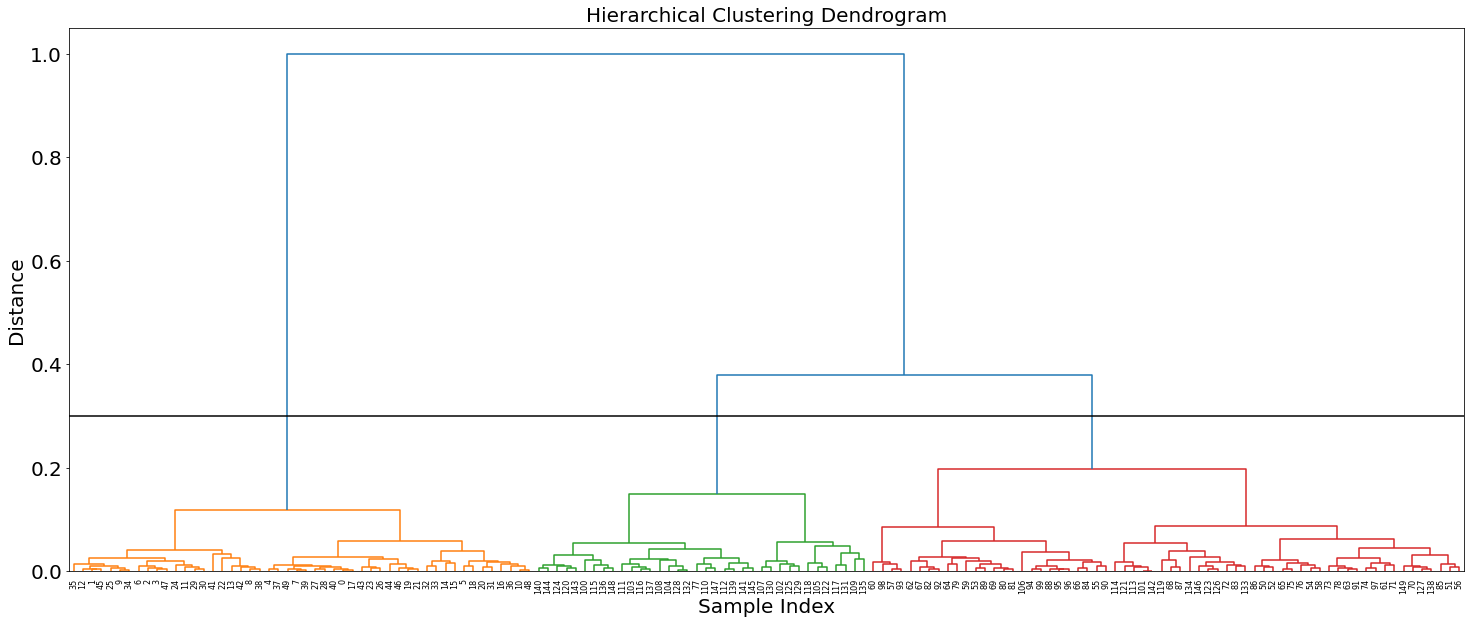

In [35]:
clusterlabels = clustering.Dendogram(data, method='ward', metric='euclidean', distanceThreshold=0.3)

### Below we show the clusters in the PCA space and look at the crosstab table and ARI score

The ARI score is similar to k-means although the clustering is slightly different as can be seen form the crosstab table below. Both clustering algorithms perfectly separate out the setosa species from the rest but there is some mixing up of the other two species.

In [36]:
fig = px.scatter(scores, x='PC1', y='PC2', color=labels, symbol=clusterlabels)
fig.update_traces(mode='markers', marker_line_width=1, marker_size=8)
fig.show()

In [37]:
# Let's look at which cell-types are in which cluster
df = pd.DataFrame({'Labels': labels, 'Clusters': clusterlabels})
ct = pd.crosstab(df['Clusters'], df['Labels'])
print(ct)

Labels    setosa  versicolor  virginica
Clusters                               
0             50           0          0
1              0          49         15
2              0           1         35


In [38]:
HierarchicalARI = adjusted_rand_score(clusterlabels, labels)
print(HierarchicalARI)

0.7311985567707745
